# SVD



From the Foundations of Data Science science book by 
Avrim Blum, John Hopcroft, and Ravindran Kannan:


Consider each row of an $n \times d$ matrix A as a point in d dimensional space. The singular value decomposition finds the best-fitting k-dimensional subspace for $k = 1, 2, 3, . . .$ , for the set of $n$ data points.



![](svd.png)

Geometrically, each point is decomposed in $A$ into its components along each of the $r$ orthogonal directions given by the $v_i$. So the projections of the rows of A in the $v_i$ direction.
.



The decomposition:

$$ A = \sum ^r _{i=1} \sigma _i \vec u_i \vec v _i ^T $$ is called the *singular value decomposition*. of A. In matrix notation $A = UDV^T$. For any matrix A, the sequence of singular values is unique and if the singular values are all disticnt, then the sequence of singular vectors is unique up to signs. If some set of singular values are equal, the correspiinding singular vectors span some subspace. 

The columns of V are the *right-singular vectors*, and the columns of U are called the *left-singular vectors*. 

If A is a $ n \times d$ matrix with singular vectors $v_1, v_2, ..., v_r$ and corresponding singular vecyors $\sigma_1, \sigma_2, \sigma_3, ... \sigma_r$. The left singular vectors of A are $u_i = \frac{1}{\sigma_i} A v_i$ where $\sigma _i \,  u_i$ corresponds to a vector whose coordinates correspond to the projections of the rows of A onto $v_i$. 



## Best Rank-k approximations


Let $A$ be an $n \times d$ matrix and think of the rows of $A$ as $n$ points in $d$ dimensional space. Let $ A = \sum ^r _{i=1} \sigma _i \vec u_i \vec v _i ^T$ be the SVD of A. For $k$ going from 1 to r, then $v_1 to v_k$ define the $k$dimensional space maximizing the variance of minimizind the sum of squared distacnes of the points to the space. 

### Square matrix

For a square matrix $B = A^T A$, then the right singular vectors of A are eigenvectors of B with eigenvalues $\sigma^2$, and the left singular vectors of A are eigenvectors of A A^T with eigenvalues $\sigma^2$. 



Let's do an example. Lets define a matrix to decompose. Let's begin with a two dimentional dataset. We follow the example from [Vanderplas](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)


In [1]:
#Plotting
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead

output_notebook()




rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
print('Shape of X (n_points, d_dimensions): {}'.format(X.shape))
p = figure(plot_width=400, plot_height=400,match_aspect=True)

# add a circle renderer with a size, color, and alpha
p.circle(X[:,0],X[:,1] ,size=2, color="navy", alpha=0.5)

# show the results
show(p)

Loading BokehJS ...

Shape of X (n_points, d_dimensions): (200, 2)


We can decompose using the [numpy SVD](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function:

In [2]:
U, D, Vtranspose = np.linalg.svd(X,full_matrices=False)

In [3]:
print('Shape of U: {}'.format(U.shape))
print('Shape of V Transpose: {}'.format(Vtranspose.shape))
print('Shape of D: {}'.format(D.shape))

Shape of U: (200, 2)
Shape of V Transpose: (2, 2)
Shape of D: (2,)


We remember that the rows of V transpose are vectors that span a subspace and the singular value is the total variance along that subspace. So lets scaled the basis vector V by their singular value. Lets overplot them. We scaled them by the so called variance ratio. How much the first vector explains the percentage of the total variance. 

In [4]:
length1 = D[0]**2/(D[1]**2+D[0]**2) *2 
length2 = D[1]**2/(D[1]**2+D[0]**2) *2 

print('Explained Variance ratios {},{}'.format(length1/2,length2/2))

p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=2),
                   line_color='red',x_start=0, y_start=0, x_end=length1 *Vtranspose[0][0], y_end=length1 *Vtranspose[0][1]))

p.add_layout(Arrow(end=OpenHead(line_color="firebrick", line_width=1),
                   line_color='red',line_width=6,x_start=0, y_start=0, x_end=length2 *Vtranspose[1][0] , y_end=length2 *Vtranspose[1][1]))



show(p)

Explained Variance ratios 0.976092003207,0.0239079967928


We remember that $\sigma_i u_i$ is a vector whose coordinates correspond to the projections of the rows of A onto $v_i$. We can plot his for each of the data points. These are the principal components. 

In [5]:
p2 = figure(plot_width=400, plot_height=400,match_aspect=True)

# add a circle renderer with a size, color, and alpha
p2.circle(U[:,0],U[:,1] ,size=2, color="navy", alpha=0.5)

# show the results
show(p2)

Much only along one axis. 

In [6]:
Unew = U.dot(np.diag(D))

p3 = figure(plot_width=400, plot_height=400,match_aspect=True)

# add a circle renderer with a size, color, and alpha
p3.circle(Unew[:,0],Unew[:,1] ,size=2, color="navy", alpha=0.5)

# show the results
show(p3)

# Using Correlation Matrix


$$C_X = \frac{1}{N-1} X^T X $$


In [7]:
cor = X.T.dot(X)/199
cor

array([[ 0.68330628,  0.23079731],
       [ 0.23079731,  0.09884853]])

We can get the same result with numpy cov

In [8]:
np.cov(X.T)

array([[ 0.68217761,  0.23093475],
       [ 0.23093475,  0.09883179]])

We need the matrix that will diagonalize the Covariance matrix $C_x$. This is the eigenvalue of $C_x$. 

In [9]:
np.linalg.eigh(np.cov(X.T))

(array([ 0.0184779,  0.7625315]), array([[ 0.32862557, -0.94446029],
        [-0.94446029, -0.32862557]]))

We check that this eigenvalues of the correlation function do indeed agree with V up to a sign. The columns of V are the eigenvectors, or the rows or Vtranspose are the eigenvectors. 

In [10]:
Vtranspose.T

array([[ 0.94465994,  0.3280512 ],
       [ 0.3280512 , -0.94465994]])

So Vtranspose.T is the matrix with the right-singular vectors as columns, or the eigenvectos of the covariance matrix. We call it R or V

$$R = V = Vtranspose.T$$

This is the projection $Y = X V$ with the covariance:

$$C_y = V^T C_x V$$

In [11]:
V = Vtranspose.T

In [12]:
np.dot(np.dot(V.T,cor) , V)

array([[  7.63455054e-01,   5.55111512e-17],
       [  5.89805982e-17,   1.86997547e-02]])

So we see the off-diagonal elements are basically zero. So we build the diagonal new covariance matrix $C_y$. 

$C_y$ define the amount of variance contained withing each compinent. If we scaled the X matrix before taking the SVD like:

## Scaled SVD


$$U D V^T = \frac{1}{\sqrt{N-1}}X$$


and the diagional of $C_y$ would be:

$$ D^2 = C_y$$

So for D divide by $\sqrt{199}$ and then take the square and we see they match $C_y$. 

In [13]:
(D/np.sqrt(199.)) **2

array([ 0.76345505,  0.01869975])

$Y = X V$

and this is just 

$$U D$$

In [14]:
np.dot(X, V)

array([[ -6.46486978e-01,  -4.44786232e-02],
       [  1.10137577e+00,  -2.43042963e-01],
       [ -6.97491207e-01,   1.83960974e-01],
       [ -2.27947088e+00,  -2.27813646e-01],
       [ -5.99548494e-01,   3.19887217e-01],
       [ -9.94216207e-01,  -6.01515915e-02],
       [ -7.46814155e-01,   9.87818594e-02],
       [  1.42679446e+00,  -1.30519143e-01],
       [  3.21490678e-01,   2.15960897e-01],
       [ -1.85846412e+00,  -2.15422638e-01],
       [  7.41793647e-01,  -9.90103354e-02],
       [ -6.08589161e-01,  -2.35843480e-02],
       [ -5.17618971e-01,   2.15956932e-01],
       [  2.49504224e-01,  -1.93528557e-01],
       [  4.18065971e-01,  -5.43009416e-02],
       [ -6.84970591e-01,  -9.85576335e-02],
       [  1.11400910e+00,  -6.36186517e-02],
       [  3.30271462e-01,   7.33043448e-02],
       [  8.27018639e-01,  -2.30163448e-01],
       [  8.42958006e-01,   1.31695556e-01],
       [  1.57052074e+00,   4.63980823e-02],
       [  2.83268441e-01,   6.32958789e-02],
       [ -

In [15]:
Unew

array([[ -6.46486978e-01,  -4.44786232e-02],
       [  1.10137577e+00,  -2.43042963e-01],
       [ -6.97491207e-01,   1.83960974e-01],
       [ -2.27947088e+00,  -2.27813646e-01],
       [ -5.99548494e-01,   3.19887217e-01],
       [ -9.94216207e-01,  -6.01515915e-02],
       [ -7.46814155e-01,   9.87818594e-02],
       [  1.42679446e+00,  -1.30519143e-01],
       [  3.21490678e-01,   2.15960897e-01],
       [ -1.85846412e+00,  -2.15422638e-01],
       [  7.41793647e-01,  -9.90103354e-02],
       [ -6.08589161e-01,  -2.35843480e-02],
       [ -5.17618971e-01,   2.15956932e-01],
       [  2.49504224e-01,  -1.93528557e-01],
       [  4.18065971e-01,  -5.43009416e-02],
       [ -6.84970591e-01,  -9.85576335e-02],
       [  1.11400910e+00,  -6.36186517e-02],
       [  3.30271462e-01,   7.33043448e-02],
       [  8.27018639e-01,  -2.30163448e-01],
       [  8.42958006e-01,   1.31695556e-01],
       [  1.57052074e+00,   4.63980823e-02],
       [  2.83268441e-01,   6.32958789e-02],
       [ -

In [16]:
raro =np.dot(X, V)

p6 = figure(plot_width=400, plot_height=400,match_aspect=True)

# add a circle renderer with a size, color, and alpha
p6.circle(raro[:,0],raro[:,1] ,size=2, color="navy", alpha=0.5)

# show the results
show(p6)

We reconstruct A in onyl one dimension. So best k apprxomation. We plot the reconstruct A in green.

In [17]:
dim = 1
Unew = U[:,0:dim]
Dnew= D[0:dim]
Vtranspose_new = Vtranspose[0:dim,:]

Ddiagonalnew = np.diag(Dnew)

Anew = np.dot(Unew.dot(Ddiagonalnew) , Vtranspose_new)


#p4 = figure(plot_width=400, plot_height=400,match_aspect=True)

# add a circle renderer with a size, color, and alpha
p.circle(Anew[:,0],Anew[:,1] ,size=2, color="green", alpha=1.)

# show the results
show(p)

# other example

In [18]:
import numpy as np
matrix = np.array([ [1,2,5,6], [2,3,7,8],[6,7,9,50]],dtype='d')

#Transpose
#matrix = matrix.T

print(matrix)
print('Shape of matrix: {}'.format(matrix.shape))

[[  1.   2.   5.   6.]
 [  2.   3.   7.   8.]
 [  6.   7.   9.  50.]]
Shape of matrix: (3, 4)


We can decompose using the [numpy SVD](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) function:

In [19]:
U, D, Vtranspose = np.linalg.svd(matrix,full_matrices=False)

The *full_matrices=False* ensures that the convection stated above is followed. Let's look at the shapes of U, D and V tranpose. 

In [20]:
print('Shape of U: {}'.format(U.shape))
print('Shape of V Transpose: {}'.format(Vtranspose.shape))
print('Shape of D: {}'.format(D.shape))

Shape of U: (3, 3)
Shape of V Transpose: (3, 4)
Shape of D: (3,)


So D only return the list of the singular values, so we have to construct the diagonal matrix with *np.diag()*. Let's reconstructe the matrix via multiplication. 

In [21]:
Ddiagonal = np.diag(D)
np.dot(U.dot(Ddiagonal) , Vtranspose)

array([[  1.,   2.,   5.,   6.],
       [  2.,   3.,   7.,   8.],
       [  6.,   7.,   9.,  50.]])

Remember that the dimensions of the matrices depend on R. We can try to reconstuct the matrix choosing less singular values $n < R$. So for instant lets reconstruct using the first two singular values

In [22]:
dim = 2
Unew = U[:,0:dim]
Dnew= D[0:dim]
Vtranspose_new = Vtranspose[0:dim,:]

In [23]:
print('Shape of new U: {}'.format(Unew.shape))
print('Shape of new V Transpose: {}'.format(Vtranspose_new.shape))
print('Shape of new D: {}'.format(Dnew.shape))

Shape of new U: (3, 2)
Shape of new V Transpose: (2, 4)
Shape of new D: (2,)


Lets reconstruct the matrix

In [24]:
Ddiagonalnew = np.diag(Dnew)
np.dot(Unew.dot(Ddiagonalnew) , Vtranspose_new)

array([[  1.29139716,   2.0855279 ,   4.92872996,   5.96590467],
       [  1.79958314,   2.9411757 ,   7.04901804,   8.02345005],
       [  5.99739176,   6.99923445,   9.00063793,  50.00030518]])

We see it is not exact put a good approximation since the highest singular values account for much of the variation. 

# SVD with Scikit-learn

The same can be achieved using [Truncated SVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) from the scikitlearn package.


We defined the dimeinsion and for the algoritm we use arpack to make scikit-learn call the scipy solver for SVD. 

In [25]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components=2,algorithm='arpack')
svdfit = sklearn_svd.fit(matrix)

In [26]:
singularvalues = svdfit.singular_values_
print('First two singular values the matrix: {}'.format(singularvalues))

First two singular values the matrix: [ 53.01701453   6.85938137]


We see that the fit model has a lot of attributes. For example the .components gives you the V transpose matrix up to a sign.

> SVD suffers from a problem called “sign indeterminancy”, which means the sign of the components_ and the output from transform depend on the algorithm and random state. To work around this, fit instances of this class to data once, then keep the instance around to do transformations.


One also useful information is the *explained_variance_ratio_ *. This represents the **percentage of variance explained by each of the selected components.**


In [27]:
print(svdfit.components_)
Vtranspose[0:2]

[[ 0.11968113  0.14407797  0.20238613  0.96122725]
 [ 0.11424978  0.27818971  0.92043332 -0.24971981]]


array([[-0.11968113, -0.14407797, -0.20238613, -0.96122725],
       [-0.11424978, -0.27818971, -0.92043332,  0.24971981]])

In [28]:
print(svdfit.explained_variance_ratio_)

[ 0.97846786  0.02142035]


So the first component explain much of the variance of the data. 

There is also the mathod transform. This actually returns $U \times D$:

In [29]:
matrix_svd = svdfit.transform(matrix)
matrix_svd

array([[  7.1871312 ,   3.77447691],
       [  9.77811705,   5.50834341],
       [ 51.60947008,  -1.56926408]])

In [30]:
Unew.dot(Ddiagonalnew)

array([[ -7.1871312 ,  -3.77447691],
       [ -9.77811705,  -5.50834341],
       [-51.60947008,   1.56926408]])

In [31]:
Unew

array([[-0.13556273, -0.55026492],
       [-0.18443357, -0.80303793],
       [-0.97345108,  0.22877633]])

Where again the columns of U are called the **left-singular vectors**. In theory we can now plot this two as the first two principal components.

We multiply times V transpose and restore the approximation of the matrix:

In [32]:
np.dot(matrix_svd , svdfit.components_)

array([[  1.29139716,   2.0855279 ,   4.92872996,   5.96590467],
       [  1.79958314,   2.9411757 ,   7.04901804,   8.02345005],
       [  5.99739176,   6.99923445,   9.00063793,  50.00030518]])

In [33]:
matrix

array([[  1.,   2.,   5.,   6.],
       [  2.,   3.,   7.,   8.],
       [  6.,   7.,   9.,  50.]])

# Principal Value Decomposition and PCA

Let's see how this two method compare to each other. In summary:

1. The *right-singular vectors* V correspond to the principal components R.
2. The diagonal matrix of eigenvalues $C_y$ is equivalent of the singular values square. 
3. The left singular vectors, U, turn out to be the eigenvectors of the correlation matrix, which has eigenvalues identical to those of the covariance matrix. 


where the columns of $R = V$ are the eigenvectors or principal components, and the diagnoral values of $C_y$ define the amount of variance contained withing eacn component (the eigenvalue of the covariant matrix. 

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='arpack')
pca.fit(matrix)
comp = pca.fit_transform(matrix)

Look at the covariance Matrix

In [35]:
pca.get_covariance()

array([[   7.        ,    7.        ,    5.        ,   65.        ],
       [   7.        ,    7.        ,    5.        ,   65.        ],
       [   5.        ,    5.        ,    4.        ,   44.        ],
       [  65.        ,   65.        ,   44.        ,  617.33333333]])

From the matrix we can get it as:

In [36]:
mean_vec = np.mean(matrix, axis=0)
cov = np.dot((matrix - mean_vec).T , (matrix - mean_vec))/(matrix.shape[0]-1)

Not sure why .T, but can do it with numpy directly

In [37]:
np.cov(matrix.T)

array([[   7.        ,    7.        ,    5.        ,   65.        ],
       [   7.        ,    7.        ,    5.        ,   65.        ],
       [   5.        ,    5.        ,    4.        ,   44.        ],
       [  65.        ,   65.        ,   44.        ,  617.33333333]])

Eigenvectors and values of covariance matrix

In [38]:
eig_vals, eig_vecs = np.linalg.eigh(cov)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.00463616  0.92966512  0.35339877 -0.10397395]
 [-0.91886279 -0.14138562  0.35339877 -0.10397395]
 [ 0.38854632 -0.33501878  0.85546406 -0.07053657]
 [ 0.068567   -0.05912096 -0.13564605 -0.9866121 ]]

Eigenvalues 
[ -7.66090223e-14   6.95035950e-14   1.15424809e+00   6.34179085e+02]


# Example Vanderplas


https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


In [39]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

# PCA with scikit learn

In [40]:
pca = PCA(n_components=1, svd_solver='arpack')
pca.fit(X)
comp = pca.fit_transform(X)

In [41]:
print('Shape of fit_transform: {}'.format(comp.shape))

Shape of fit_transform: (200, 1)


In [42]:
U, D, Vtranspose = np.linalg.svd(X,full_matrices=False)
dim = 1
Unew = U[:,0:dim]
Dnew= D[0:dim]
Vtranspose_new = Vtranspose[0:dim,:]


In [43]:
print('Shape of new U: {}'.format(Unew.shape))
print('Shape of new V Transpose: {}'.format(Vtranspose_new.shape))
print('Shape of new D: {}'.format(Dnew.shape))

Shape of new U: (200, 1)
Shape of new V Transpose: (1, 2)
Shape of new D: (1,)


In [44]:
print('PCA Singular v '+ str(pca.singular_values_[0]))
print('Singular values '+str(D[0]))

PCA Singular v 12.3184320705
Singular values 12.3258896515


In [45]:
print('pca components '+ str(pca.components_[0]))
print('VTranspose '+ str(Vtranspose_new[0]))

pca components [-0.94446029 -0.32862557]
VTranspose [ 0.94465994  0.3280512 ]


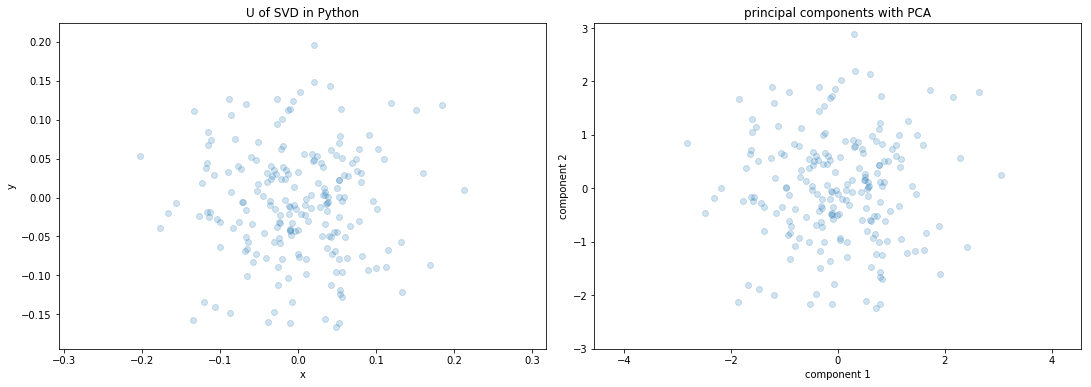

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


pca = PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(-U[:, 0], -U[:, 1], alpha=0.2)
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='U of SVD in Python')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components with PCA',
          xlim=(-5, 5), ylim=(-3, 3.1))

plt.show()

In [47]:
X_pca

array([[  7.75017864e-01,   4.39469559e-01],
       [ -1.22672528e+00,   1.89239746e+00],
       [  8.33585596e-01,  -1.24082757e+00],
       [  2.64493895e+00,   1.79548612e+00],
       [  7.21518918e-01,  -2.24121269e+00],
       [  1.17321701e+00,   5.56323914e-01],
       [  8.90009579e-01,  -6.13983271e-01],
       [ -1.59930756e+00,   1.06315564e+00],
       [ -3.33302461e-01,  -1.48079459e+00],
       [  2.16282209e+00,   1.70244785e+00],
       [ -8.14841322e-01,   8.34424055e-01],
       [  7.31632865e-01,   2.85590434e-01],
       [  6.27623083e-01,  -1.47701178e+00],
       [ -2.51150683e-01,   1.53195343e+00],
       [ -4.44086059e-01,   5.06965713e-01],
       [  8.19050593e-01,   8.37476172e-01],
       [ -1.24106769e+00,   5.72398623e-01],
       [ -3.43457316e-01,  -4.31375085e-01],
       [ -9.12529995e-01,   1.79887607e+00],
       [ -9.30531341e-01,  -8.63225862e-01],
       [ -1.76377580e+00,  -2.38986147e-01],
       [ -2.89637704e-01,  -3.57537132e-01],
       [  

In [48]:
U * np.sqrt(X.shape[0])

array([[ -7.41748205e-01,  -3.26078257e-01],
       [  1.26366582e+00,  -1.78177785e+00],
       [ -8.00268015e-01,   1.34864053e+00],
       [ -2.61535575e+00,  -1.67012985e+00],
       [ -6.87893235e-01,   2.34513253e+00],
       [ -1.14071607e+00,  -4.40978715e-01],
       [ -8.56858804e-01,   7.24181960e-01],
       [  1.63703565e+00,  -9.56851893e-01],
       [  3.68863011e-01,   1.58323590e+00],
       [ -2.13231275e+00,  -1.57928985e+00],
       [  8.51098513e-01,  -7.25856946e-01],
       [ -6.98266064e-01,  -1.72899756e-01],
       [ -5.93891223e-01,   1.58320683e+00],
       [  2.86269201e-01,  -1.41878165e+00],
       [  4.79668878e-01,  -3.98086881e-01],
       [ -7.85902460e-01,  -7.22538132e-01],
       [  1.27816070e+00,  -4.66396160e-01],
       [  3.78937662e-01,   5.37403167e-01],
       [  9.48881589e-01,  -1.68735654e+00],
       [  9.67169655e-01,   9.65476315e-01],
       [  1.80194030e+00,   3.40150048e-01],
       [  3.25008646e-01,   4.64029873e-01],
       [ -

So we see that this two only differ by the factor that the matrix was divided to do the PCA, which is $1/\sqrt{n}$. In this case

In [49]:
print(X_pca[0:5,0]/U[0:5,0])

print('factor: {}'.format(np.sqrt(X.shape[0])))

[-14.77645336 -13.72872088 -14.73091555 -14.30210226 -14.83343324]
factor: 14.1421356237


So scaled SVD is just:

$$ U D V^T = \frac{1}{\sqrt{N-1}} X $$

In [50]:
D

array([ 12.32588965,   1.92905448])

In [51]:
X.shape

(200, 2)

In [52]:
np.sqrt(X.shape[0])

14.142135623730951